In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import time, datetime

In [46]:
df = pd.read_csv('My Uber Drives - 2016.csv')

In [47]:
df


,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1156 non-null   object 
 1   END_DATE*    1155 non-null   object 
 2   CATEGORY*    1155 non-null   object 
 3   START*       1155 non-null   object 
 4   STOP*        1155 non-null   object 
 5   MILES*       1156 non-null   float64
 6   PURPOSE*     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [49]:
df.columns = df.columns.str.replace("*","")

In [50]:
df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [51]:
df.drop(index=1155,inplace=True)

In [52]:
df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1150,12/31/2016 1:07,12/31/2016 1:14,Business,Kar?chi,Kar?chi,0.7,Meeting
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site


In [53]:
df.isnull().sum()

START_DATE      0
END_DATE        0
CATEGORY        0
START           0
STOP            0
MILES           0
PURPOSE       502
dtype: int64

In [54]:
df['START_DATE']= pd.to_datetime(df['START_DATE'],errors='coerce') #converting datatype to datetime , if there is a error, 
#using coerce we can tell that dont stop the execution because of the data

In [55]:
df['END_DATE']= pd.to_datetime(df['END_DATE'],errors='coerce')

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  1155 non-null   datetime64[ns]
 1   END_DATE    1155 non-null   datetime64[ns]
 2   CATEGORY    1155 non-null   object        
 3   START       1155 non-null   object        
 4   STOP        1155 non-null   object        
 5   MILES       1155 non-null   float64       
 6   PURPOSE     653 non-null    object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 63.3+ KB


In [57]:
### frequency of start location

start= df['START'].value_counts()

In [58]:
start[start>10]  #start location booked more than 10 times

Cary                201
Unknown Location    148
Morrisville          85
Whitebridge          68
Islamabad            57
Durham               37
Lahore               36
Raleigh              28
Kar?chi              27
Westpark Place       17
Apex                 17
Berkeley             16
Midtown              14
Kenner               11
Kissimmee            11
R?walpindi           11
Name: START, dtype: int64

In [59]:
#frequency of all end locations

stop=df['STOP'].value_counts()

In [60]:
stop     #cary has more

Cary                 203
Unknown Location     149
Morrisville           84
Whitebridge           65
Islamabad             58
                    ... 
Daytona Beach          1
Sand Lake Commons      1
Sky Lake               1
Vista East             1
Ilukwatta              1
Name: STOP, Length: 188, dtype: int64

In [61]:
#Scatter plot is not so good to represt 

# analysing miles and pupose column and create a minute column

miles= df['MILES'].value_counts()



In [62]:
miles[miles>10] 

9.9     28
3.1     26
2.1     19
10.4    19
3.0     19
2.5     19
1.7     18
1.8     18
2.2     18
2.8     16
1.9     16
2.0     16
3.3     16
6.1     15
3.8     15
5.5     14
1.4     14
1.6     13
7.9     13
2.7     12
2.3     12
6.2     12
5.7     12
2.9     12
1.5     12
6.0     11
4.9     11
7.7     11
5.1     11
1.0     11
Name: MILES, dtype: int64

<AxesSubplot:>

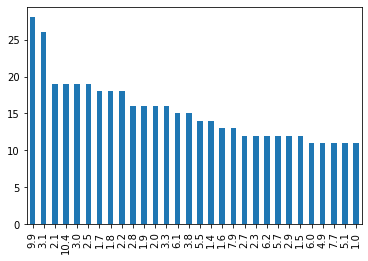

In [63]:
miles[miles>10].plot(kind='bar')

Text(0.5, 1.0, 'most frequency bookes miles')

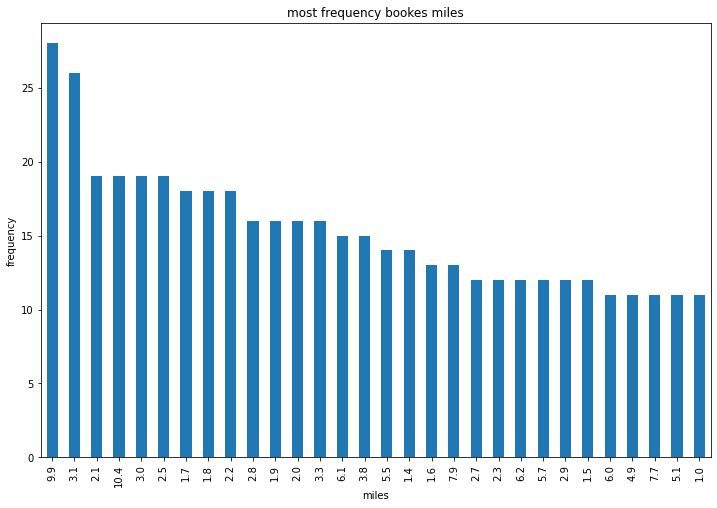

In [64]:
#increasing the size, adding title, adding label

plt.figure(figsize=(12,8))
miles[miles>10].plot(kind='bar')
plt.xlabel('miles')
plt.ylabel('frequency')
plt.title('most frequency bookes miles')

In [65]:
df['PURPOSE'].value_counts()

Meeting            187
Meal/Entertain     160
Errand/Supplies    128
Customer Visit     101
Temporary Site      50
Between Offices     18
Moving               4
Airport/Travel       3
Charity ($)          1
Commute              1
Name: PURPOSE, dtype: int64

In [66]:
df[df['MILES']>10]

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
9,2016-01-10 12:17:00,2016-01-10 12:44:00,Business,Jamaica,New York,16.5,Customer Visit
10,2016-01-10 15:08:00,2016-01-10 15:51:00,Business,New York,Queens,10.8,Meeting
22,2016-01-12 16:02:00,2016-01-12 17:00:00,Business,New York,Queens County,15.1,Meeting
23,2016-01-13 13:54:00,2016-01-13 14:07:00,Business,Downtown,Gulfton,11.2,Meeting
...,...,...,...,...,...,...,...
1133,2016-12-29 09:44:00,2016-12-29 10:07:00,Business,Kar?chi,Unknown Location,11.6,Meal/Entertain
1134,2016-12-29 11:28:00,2016-12-29 12:00:00,Business,Unknown Location,Kar?chi,11.9,Meal/Entertain
1144,2016-12-29 23:14:00,2016-12-29 23:47:00,Business,Unknown Location,Kar?chi,12.9,Meeting
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting


In [67]:
df.groupby(['PURPOSE'])['MILES'].mean()

PURPOSE
Airport/Travel       5.500000
Between Offices     10.944444
Charity ($)         15.100000
Commute            180.200000
Customer Visit      20.688119
Errand/Supplies      3.968750
Meal/Entertain       5.698125
Meeting             15.247594
Moving               4.550000
Temporary Site      10.474000
Name: MILES, dtype: float64

In [68]:
#average miles travelled for a particlar purpose

df.groupby(['PURPOSE'])['MILES'].mean()


PURPOSE
Airport/Travel       5.500000
Between Offices     10.944444
Charity ($)         15.100000
Commute            180.200000
Customer Visit      20.688119
Errand/Supplies      3.968750
Meal/Entertain       5.698125
Meeting             15.247594
Moving               4.550000
Temporary Site      10.474000
Name: MILES, dtype: float64

In [69]:
df.groupby(['PURPOSE']).agg({'MILES':['mean',max,min]})

MILES              
                       mean    max    min
PURPOSE                                  
Airport/Travel     5.500000    7.6    4.1
Between Offices   10.944444   39.2    1.9
Charity ($)       15.100000   15.1   15.1
Commute          180.200000  180.2  180.2
Customer Visit    20.688119  310.3    0.8
Errand/Supplies    3.968750   22.3    0.5
Meal/Entertain     5.698125   36.5    0.6
Meeting           15.247594  201.0    0.7
Moving             4.550000    6.1    3.3
Temporary Site    10.474000   48.2    1.8

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Meal/Entertain'),
  Text(1, 0, 'Errand/Supplies'),
  Text(2, 0, 'Meeting'),
  Text(3, 0, 'Customer Visit'),
  Text(4, 0, 'Temporary Site'),
  Text(5, 0, 'Between Offices'),
  Text(6, 0, 'Charity ($)'),
  Text(7, 0, 'Commute'),
  Text(8, 0, 'Moving'),
  Text(9, 0, 'Airport/Travel')])

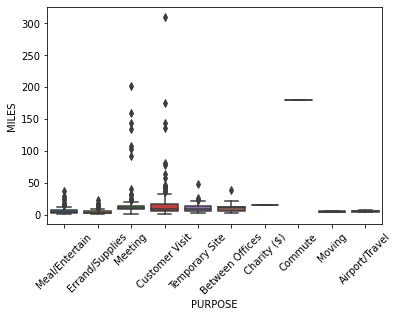

In [70]:
sns.boxplot(data=df,x=df.PURPOSE,y = df.MILES)  #identify the outliers
plt.xticks(rotation=45)

<AxesSubplot:xlabel='PURPOSE', ylabel='count'>

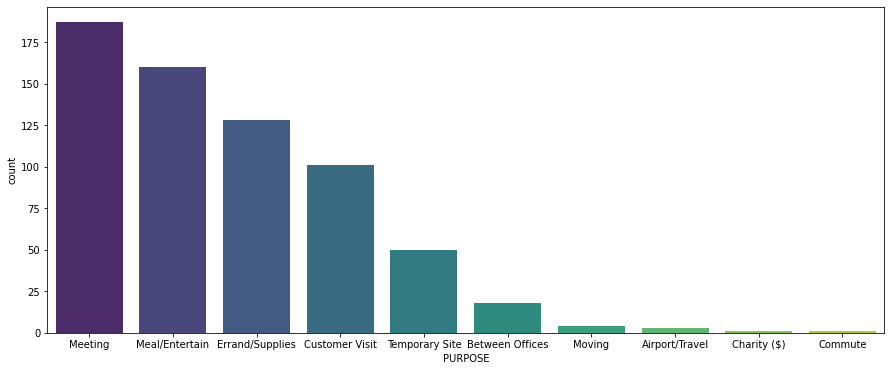

In [71]:
plt.figure(figsize=(15,6))
sns.countplot(df['PURPOSE'],order=df['PURPOSE'].value_counts().index, palette='viridis')

In [72]:
df['minutes'] = df.END_DATE - df.START_DATE

In [73]:
df 

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,minutes
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,0 days 00:06:00
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN,0 days 00:12:00
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,0 days 00:13:00
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,0 days 00:14:00
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,0 days 01:07:00
...,...,...,...,...,...,...,...,...
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Kar?chi,Kar?chi,0.7,Meeting,0 days 00:07:00
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.9,Temporary Site,0 days 00:18:00
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting,0 days 00:35:00
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site,0 days 00:18:00


In [74]:
df['minutes'] = df['minutes'].dt.total_seconds()/60   #first converting to secongs and diving by 60 for seconds

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Meal/Entertain'),
  Text(1, 0, 'Errand/Supplies'),
  Text(2, 0, 'Meeting'),
  Text(3, 0, 'Customer Visit'),
  Text(4, 0, 'Temporary Site'),
  Text(5, 0, 'Between Offices'),
  Text(6, 0, 'Charity ($)'),
  Text(7, 0, 'Commute'),
  Text(8, 0, 'Moving'),
  Text(9, 0, 'Airport/Travel')])

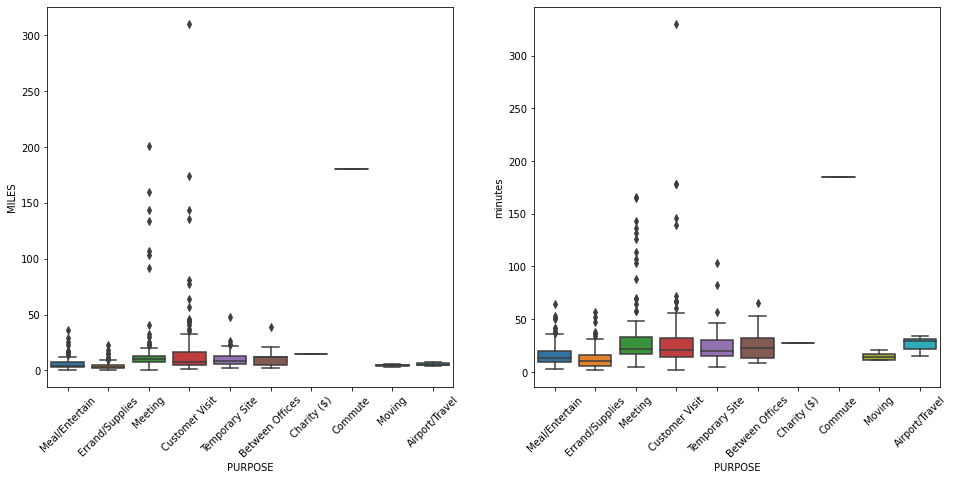

In [75]:
plt.figure(figsize=(16,7))
plt.subplot(1,2,1)
sns.boxplot(data=df,x=df.PURPOSE,y=df.MILES)
plt.xticks(rotation=45)
plt.subplot(1,2,2)
sns.boxplot(data=df,x=df.PURPOSE,y=df.minutes)
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Meal/Entertain'),
  Text(1, 0, 'Errand/Supplies'),
  Text(2, 0, 'Meeting'),
  Text(3, 0, 'Customer Visit'),
  Text(4, 0, 'Temporary Site'),
  Text(5, 0, 'Between Offices'),
  Text(6, 0, 'Charity ($)'),
  Text(7, 0, 'Commute'),
  Text(8, 0, 'Moving'),
  Text(9, 0, 'Airport/Travel')])

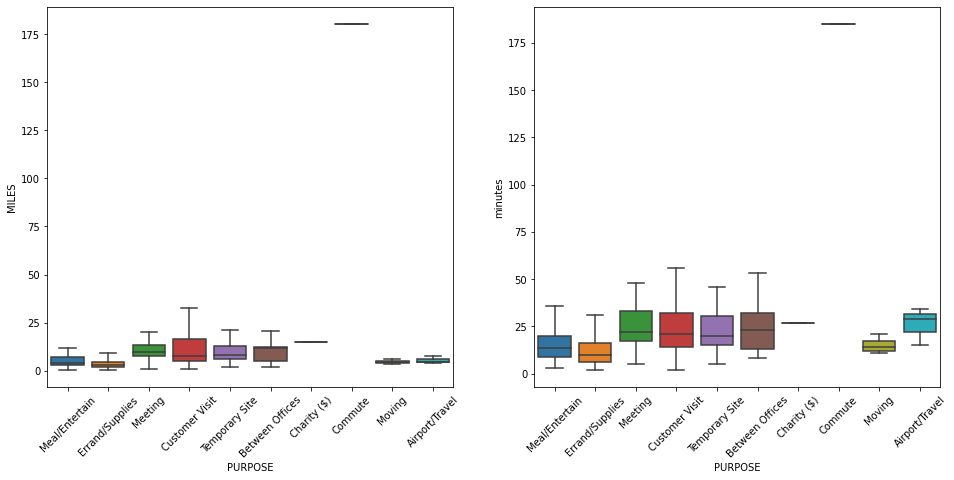

In [76]:
plt.figure(figsize=(16,7))
plt.subplot(1,2,1)
sns.boxplot(data=df,x=df.PURPOSE,y=df.MILES,showfliers=False)
plt.xticks(rotation=45)
plt.subplot(1,2,2)
sns.boxplot(data=df,x=df.PURPOSE,y=df.minutes,showfliers=False)
plt.xticks(rotation=45)

In [77]:
######################################## round trip

############# month column
df['month'] = pd.DatetimeIndex(df['START_DATE']).month

In [78]:
df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,minutes,month
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,6.0,1
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN,12.0,1
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,13.0,1
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,14.0,1
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,67.0,1
...,...,...,...,...,...,...,...,...,...
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Kar?chi,Kar?chi,0.7,Meeting,7.0,12
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.9,Temporary Site,18.0,12
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting,35.0,12
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site,18.0,12


In [79]:
dic = {1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'}
df['month'] = df['month'].map(dic)

In [80]:
df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,minutes,month
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,6.0,jan
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN,12.0,jan
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,13.0,jan
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,14.0,jan
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,67.0,jan
...,...,...,...,...,...,...,...,...,...
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Kar?chi,Kar?chi,0.7,Meeting,7.0,dec
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.9,Temporary Site,18.0,dec
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting,35.0,dec
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site,18.0,dec


<AxesSubplot:xlabel='month', ylabel='count'>

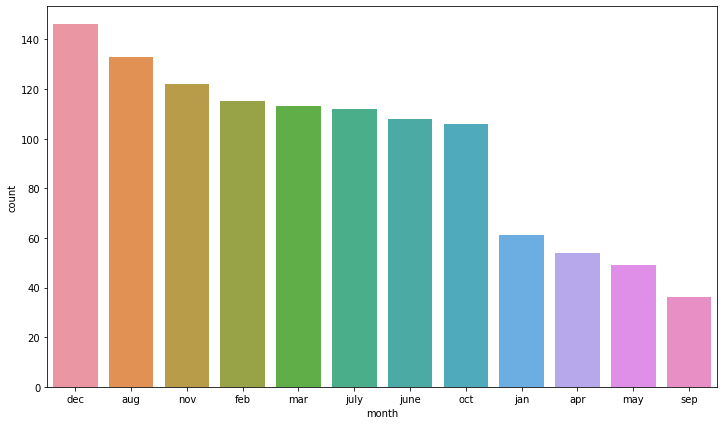

In [81]:
plt.figure(figsize=(12,7))
sns.countplot(df['month'],order=df['month'].value_counts().index)

In [82]:
df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,minutes,month
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,6.0,jan
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN,12.0,jan
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,13.0,jan
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,14.0,jan
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,67.0,jan
...,...,...,...,...,...,...,...,...,...
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Kar?chi,Kar?chi,0.7,Meeting,7.0,dec
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.9,Temporary Site,18.0,dec
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting,35.0,dec
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site,18.0,dec


In [83]:
##### which month is having more round trips

#plt.figure(figsize=(8,5))
def round(x):
    if x['START'] == x['STOP']:
        return 'yes'
    else:
        return 'no'


In [84]:
df['Round_trip'] = df.apply(round,axis=1)

<AxesSubplot:xlabel='Round_trip', ylabel='count'>

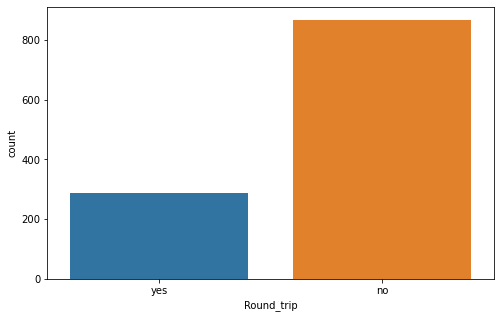

In [85]:
plt.figure(figsize=(8,5))
sns.countplot(df['Round_trip'])


In [86]:
df['Round_trip'].value_counts()

no     867
yes    288
Name: Round_trip, dtype: int64

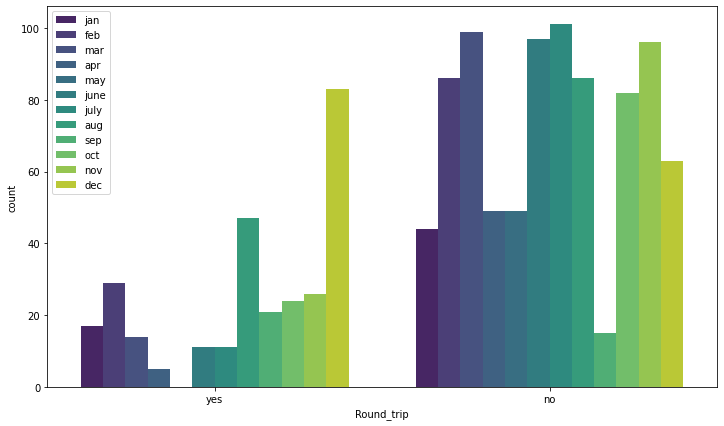

In [87]:
plt.figure(figsize=(12,7))
sns.countplot(df['Round_trip'],hue=df['month'],palette = 'viridis')
plt.legend()

In [88]:
#another way for above roundtrip

a = df.groupby(['month','Round_trip']).agg({'Round_trip':'count'})
a.columns = ['countdata']
a =a.reset_index()

In [89]:
a

,month,Round_trip,countdata
0,apr,no,49
1,apr,yes,5
2,aug,no,86
3,aug,yes,47
4,dec,no,63
5,dec,yes,83
6,feb,no,86
7,feb,yes,29
8,jan,no,44
9,jan,yes,17


In [90]:
a[a['Round_trip']=='yes'].sort_values(by = ['countdata'],ascending=False)

,month,Round_trip,countdata
5,dec,yes,83
3,aug,yes,47
7,feb,yes,29
18,nov,yes,26
20,oct,yes,24
22,sep,yes,21
9,jan,yes,17
15,mar,yes,14
11,july,yes,11
13,june,yes,11


In [91]:
pd.set_option('display.max_rows',None)

df[df['month']=='dec'].groupby(['PURPOSE','month','Round_trip'])['month'].count()

PURPOSE          month  Round_trip
Airport/Travel   dec    yes            2
Between Offices  dec    yes            1
Customer Visit   dec    no            15
                        yes            9
Errand/Supplies  dec    no            10
                        yes           31
Meal/Entertain   dec    no            18
                        yes           11
Meeting          dec    no            10
                        yes           18
Temporary Site   dec    no             6
                        yes            3
Name: month, dtype: int64

<AxesSubplot:xlabel='minutes', ylabel='MILES'>

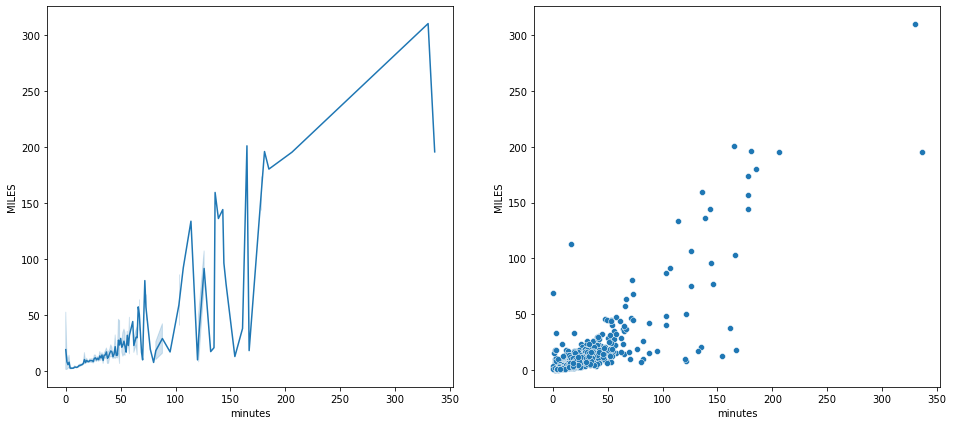

In [92]:
## line plot or scatter - x axis= minutes and y axis =miles
plt.figure(figsize = (16,7))
plt.subplot(1,2,1)
sns.lineplot(data=df,x=df.minutes, y=df.MILES)
plt.subplot(1,2,2)
sns.scatterplot(data=df,x=df.minutes,y=df.MILES)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Meal/Entertain'),
  Text(1, 0, 'Errand/Supplies'),
  Text(2, 0, 'Meeting'),
  Text(3, 0, 'Customer Visit'),
  Text(4, 0, 'Temporary Site'),
  Text(5, 0, 'Between Offices'),
  Text(6, 0, 'Charity ($)'),
  Text(7, 0, 'Commute'),
  Text(8, 0, 'Moving'),
  Text(9, 0, 'Airport/Travel')])

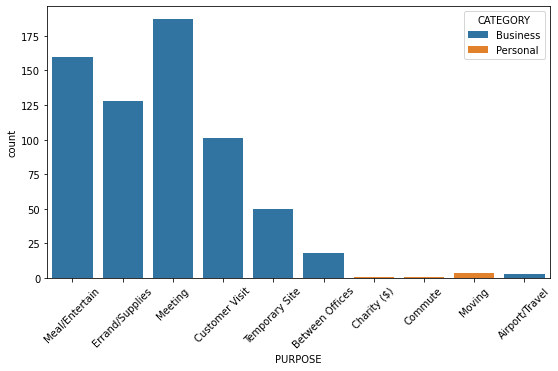

In [93]:
### business or personal category
plt.figure(figsize=(9,5))
sns.countplot(data=df,x='PURPOSE',hue='CATEGORY',dodge=False)
plt.xticks(rotation=45)

In [94]:
a = df.groupby(['CATEGORY','START']).agg({'START':'count'})

In [95]:
a.columns=['countdata']

In [96]:
a.reset_index()

,CATEGORY,START,countdata
0,Business,Agnew,4
1,Business,Almond,1
2,Business,Apex,17
3,Business,Arabi,1
4,Business,Arlington,1
5,Business,Arlington Park at Amberly,1
6,Business,Asheville,2
7,Business,Austin,1
8,Business,Banner Elk,1
9,Business,Bellevue,1


In [97]:
a.reset_index().sort_values(by=['CATEGORY','countdata'],ascending=False)

,CATEGORY,START,countdata
201,Personal,Whitebridge,9
169,Personal,Banner Elk,7
183,Personal,Kissimmee,6
187,Personal,Morrisville,6
180,Personal,Islamabad,5
190,Personal,Orlando,4
191,Personal,Preston,4
171,Personal,Cary,3
170,Personal,Boone,2
173,Personal,Couples Glen,2


In [98]:
df.groupby(['CATEGORY'])['MILES'].mean()

CATEGORY
Business    10.655844
Personal     9.320779
Name: MILES, dtype: float64

In [ ]:
# CONCLUSION

# 1. majory trips are for business category
# 2. majority round trip were in dec
# 3. highest overall booking in dec
# 4. cary is the most frequent start and stop location
# 5. majority times purpose of trip is meeting
# 6. for airpost only business trips were booked.
# 7. for commute, charity and moving only personal trips were booked
# 8.all trips booked in islamabad were round trips
# 9.seasonality in data is there 
# 10. least booking in september
# 11. for round trips average mile is 7.7
# 12. very few cabs were booked for charity, commute and meeting
# 13. when cary is sttop and start location then very short trip were there(less miles).
